# Análise exploratória de dados

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Markdown
import numpy as np

## 1. Leitura de dados

In [3]:
df = pd.read_csv('../data/raw/day.csv')
print("\nPrimeiras linhas do conjunto de dados:")
df.head()


Primeiras linhas do conjunto de dados:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 1.1 Descrição dos Dados

#### O conjunto de dados "Bike Sharing" do Kaggle registra o uso de bicicletas compartilhadas em Washington, D.C. durante 2011 e 2012. Ele inclui variáveis como data, estação do ano, se o dia é feriado ou útil, situação climática, temperatura, sensação térmica, umidade, velocidade do vento, além do número de usuários casuais, registrados e o total de aluguéis. Essas informações permitem analisar padrões de uso e construir modelos para prever a demanda de bicicletas com base em condições climáticas e temporais.

---

### Obtendo informações gerais sobre o DataFrame:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Estatísticas descritivas:

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Valores únicos presentes nas vaiáveis categóricas:

In [4]:
print("\nQuantidade de valores faltantes por variável:")
print(df.isnull().sum())


Quantidade de valores faltantes por variável:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Percebemos que não há valores faltantes em nenhuma das colunas do dataset.

### 1.1 Dicionário de dados:

In [5]:
dictionary = pd.read_csv("../data/external/dictionary.csv")
dictionary

,variavel,descricao,tipo,subtipo
0,instant,Índice de registro,quantitativa,discreta
1,dteday,Data,qualitativa,ordinal
2,season,Estação do ano,qualitativa,ordinal
3,yr,Ano,qualitativa,ordinal
4,mnth,Mês,qualitativa,ordinal
5,holiday,Se o dia é feriado ou não,qualitativa,nominal
6,weekday,Dia da semana,qualitativa,nominal
7,workingday,Se o dia não é fim de semana e nem feriado,qualitativa,nominal
8,weathersit,Clima,qualitativa,nominal
9,temp,Temperatura normalizada em Celsius,quantitativa,contínua


---

## 2. Perguntas de partida e hipóteses

#### Pergunta 1: Quais fatores influenciam mais a demanda por bicicletas compartilhadas?
- **Hipóteses:** Fatores como: chuva, temperatura e dias úteis influenciam na demanda dos aluguéis.

#### Pergunta 2: Como a demanda por bicicletas varia ao longo da semana e das estações do ano?
- **Hipóteses:** Há maiores demandas por bicicletas em fins de semana para lazer, enquanto nos dias úteis a demanda é mais associada ao deslocamento e a demanda por bicicletas tende a  aumentar durante a primavera e o verão, devido ao clima mais favorável.

#### Pergunta 3: Quais são as diferenças entre o comportamento de usuários casuais e registrados?
- **Hipóteses:** Usuários casuais tendem a usar as bicicletas mais durante os finais de semana, enquanto os usuários registrados usam mais durante os dias úteis.

#### Pergunta 4: Quais condições climáticas têm o maior impacto negativo na utilização das bicicletas?
- **Hipóteses:** Chuvas fortes, neve e temperaturas extremas são as condições climáticas que mais negativamente impactam a demanda por bicicletas.

#### Pergunta 5: Existe uma correlação significativa entre eventos especiais (como feriados e eventos locais) e o uso das bicicletas compartilhadas?
- **Hipóteses:** A demanda por bicicletas aumenta significativamente durante feriados e eventos locais devido ao aumento no turismo e nas atividades ao ar livre.

--- 

### Antes de iniciarmos a análise exploratória, faremos um mapeamento em algumas variáveis qualitativas para facilitar a visualização e o entendimento dos gráficos:

In [7]:
map_pt = {
    'season': {1: 'Primavera', 2: 'Verão', 3: 'Outono', 4: 'Inverno'},
    'yr': {0: '2011', 1: '2012'},
    'mnth': {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'},
    'holiday': {0: 'Não', 1: 'Sim'},
    'weekday': {0: 'Domingo', 1: 'Segunda', 2: 'Terça', 3: 'Quarta', 4: 'Quinta', 5: 'Sexta', 6: 'Sábado'},
    'workingday': {0: 'Não Útil', 1: 'Dia Útil'},
    'weathersit': {1: 'Céu Limpo/parcialmente nublado', 2: 'Nublado', 3: 'Chuva/Neve Leve', 4: 'Chuva/Neve Forte'}
}

map_en = {
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: '2011', 1: '2012'},
    'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
    'holiday': {0: 'No', 1: 'Yes'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'workingday': {0: 'Non-working Day', 1: 'Working Day'},
    'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
}

def aplicar_mapeamento(df, mapeamento):
    df_mapeado = df.copy()
    for coluna, mapa in mapeamento.items():
        df_mapeado[coluna] = df_mapeado[coluna].map(mapa)
    return df_mapeado

# Aplicar mapeamento em português
df_pt = aplicar_mapeamento(df, map_pt)

# Aplicar mapeamento em inglês
df_en = aplicar_mapeamento(df, map_en)

---

### Pergunta 1: Quais fatores influenciam mais a demanda por bicicletas compartilhadas?

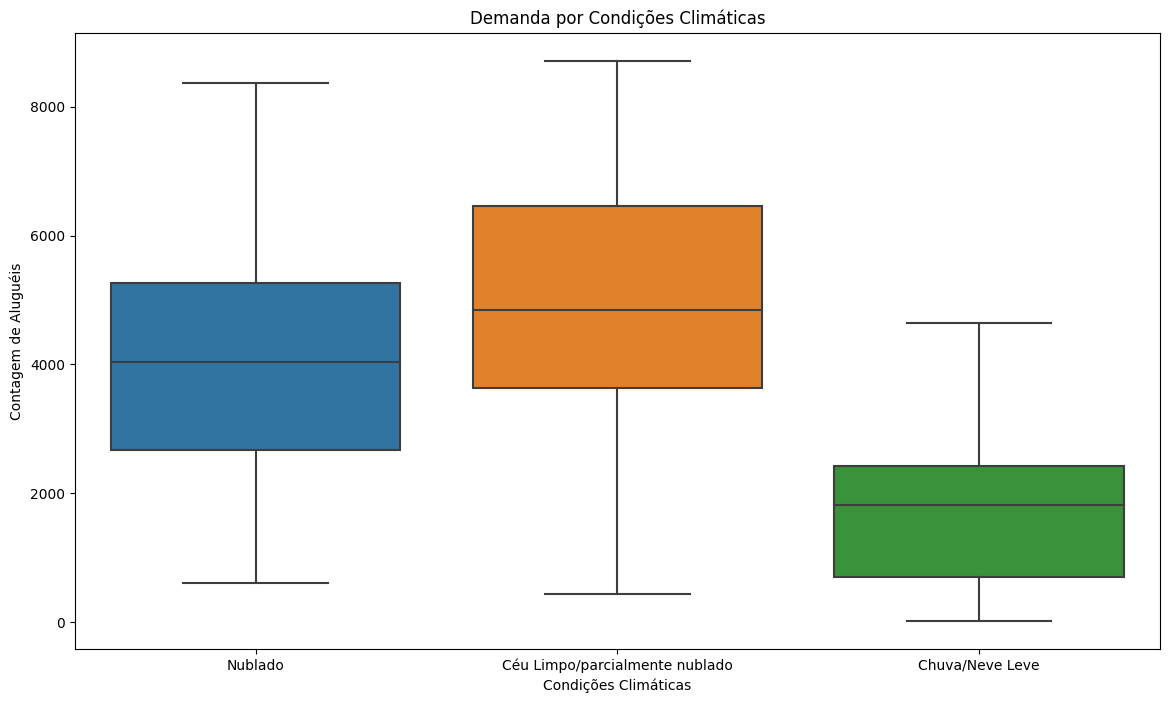

In [8]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='weathersit', y='cnt', data=df_pt,)
plt.title('Demanda por Condições Climáticas')
plt.xlabel('Condições Climáticas')
plt.ylabel('Contagem de Aluguéis')
plt.show()

Ao observar o gráfico acima é possível observar: 
- Há uma clara tendência de maior demanda quando as condições climáticas são mais favoráveis.
- As medianas das demandas são claramente maiores para os climas de céu limpo e nublado, enquanto o clima de chuva/neve leve apresenta uma demanda consideravelmente menor.
- No gráfico não houve observação de demanda para a condição de clima mais branda (Chuva/Neve Forte), o que pode indicar que não há uso algum nessas condições, vamos constatar abixo:

In [9]:
print(df_pt['weathersit'].value_counts())

Céu Limpo/parcialmente nublado    463
Nublado                           247
Chuva/Neve Leve                    21
Name: weathersit, dtype: int64


Notamos que realmente não há registros para a condição climática Chuva/Neve Pesada.

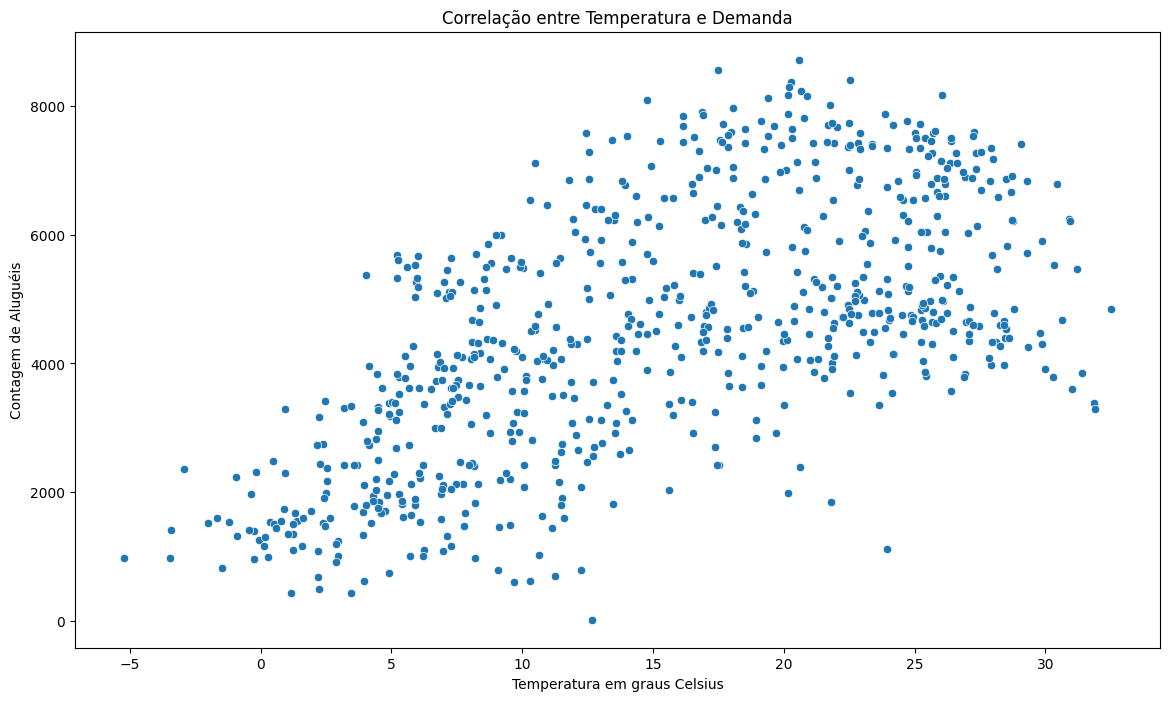

In [10]:
t_min = -8
t_max = 39
df_pt['temp_celsius'] = df_pt['temp'] * (t_max - t_min) + t_min
df_pt['atemp_celsius'] = df_pt['atemp'] * (t_max - t_min) + t_min

plt.figure(figsize=(14, 8))
sns.scatterplot(x='temp_celsius', y='cnt', data=df_pt)
plt.title('Correlação entre Temperatura e Demanda')
plt.xlabel('Temperatura em graus Celsius')
plt.ylabel('Contagem de Aluguéis')
plt.show()

- É perceptível que as maiores demandas encontram-se entre os 15 e 30 graus.
- Existem poucas ocorrências em que houveram menos de dois mil aluguéis quando a temperatura esteve acima dos 15 graus.

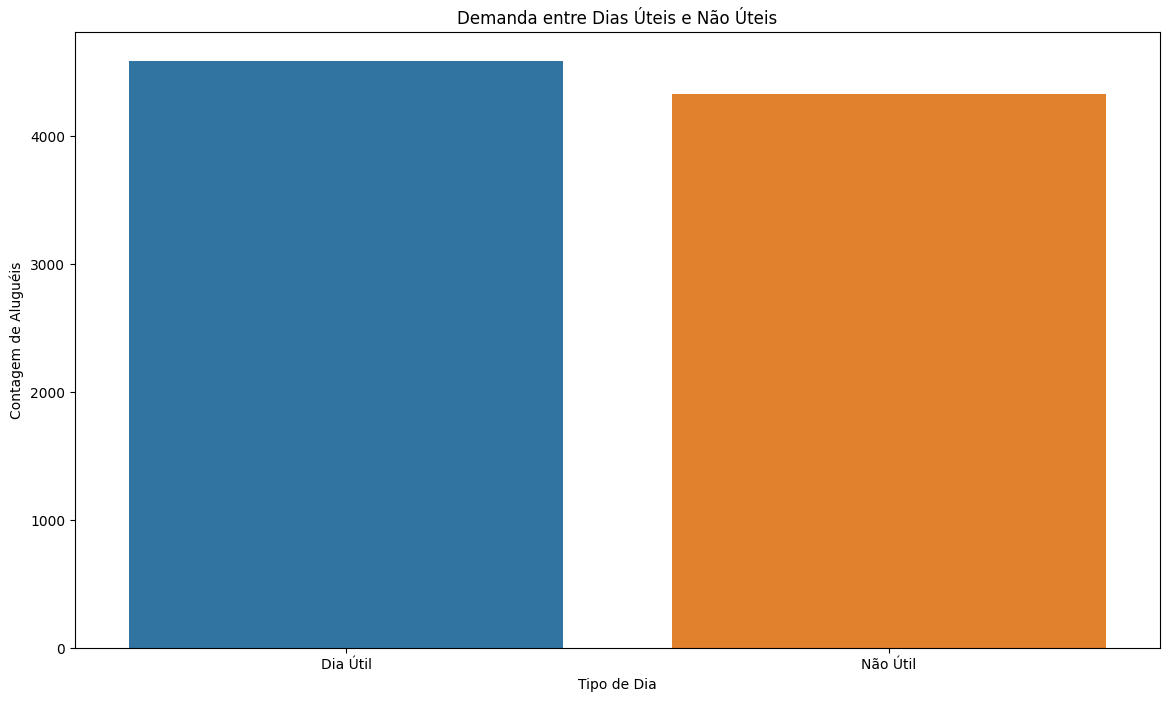

In [11]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='workingday', y='cnt', data=df_pt, ci=None, order=['Dia Útil', 'Não Útil'])
plt.title('Demanda entre Dias Úteis e Não Úteis')
plt.xlabel('Tipo de Dia')
plt.ylabel('Contagem de Aluguéis')
plt.show()

- Existe uma ligeira superioridade na média da demanda nos dias úteis.

---

### Pergunta 2: Como a demanda por bicicletas varia ao longo da semana e das estações do ano?

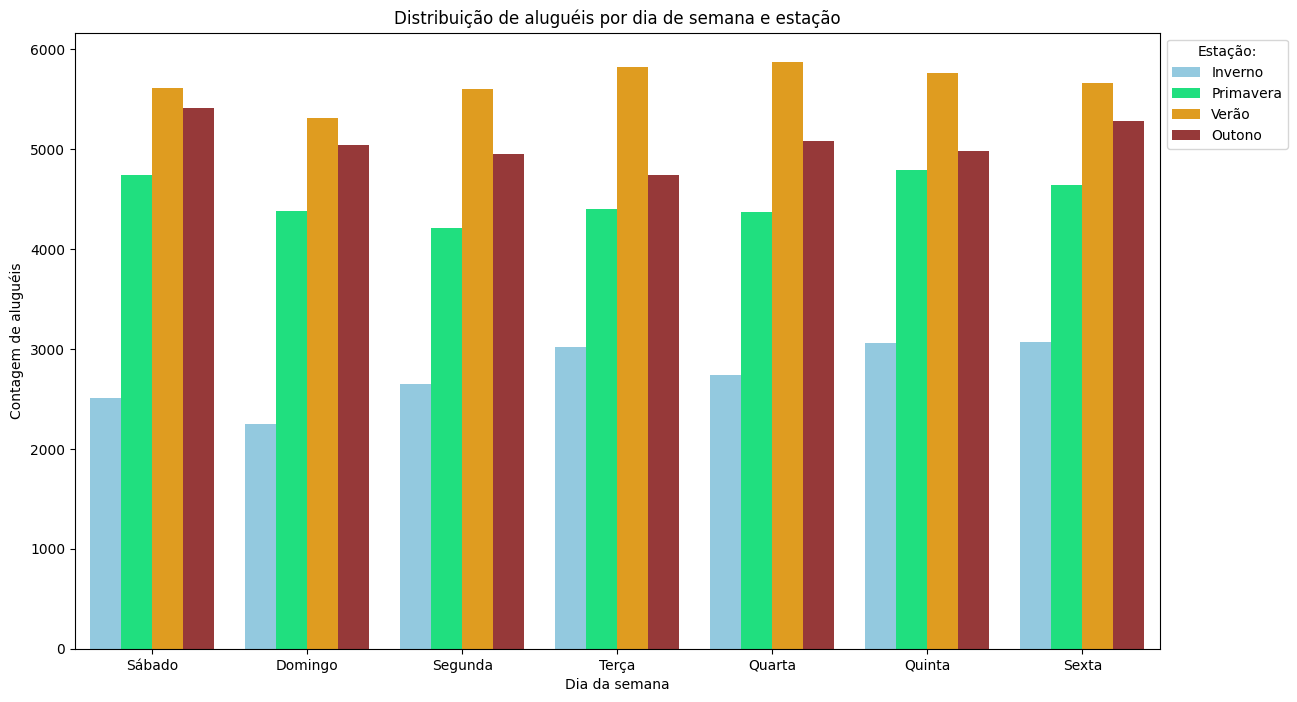

In [12]:
cores_estacoes = {
    'Primavera': 'springgreen',
    'Verão': 'orange',
    'Outono': 'brown',
    'Inverno': 'skyblue'
}

df_pt['dteday'] = pd.to_datetime(df_pt['dteday'])
df_pt['year'] = df_pt['dteday'].dt.year
df_pt['month'] = df_pt['dteday'].dt.month
df_pt['month'] = df_pt['month'].map(map_pt['mnth'])

def definir_estacao(mes):
    if mes in ['Dezembro', 'Janeiro', 'Fevereiro']:
        return 'Inverno'
    elif mes in ['Março', 'Abril', 'Maio']:
        return 'Primavera'
    elif mes in ['Junho', 'Julho', 'Agosto']:
        return 'Verão'
    elif mes in ['Setembro', 'Outubro', 'Novembro']:
        return 'Outono'

df_pt['season'] = df_pt['month'].apply(definir_estacao)

cores_estacoes = {
    'Primavera': 'springgreen',
    'Verão': 'orange',
    'Outono': 'brown',
    'Inverno': 'skyblue'
}

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(data=df_pt, x='weekday', y='cnt', hue='season', ci=None, palette=cores_estacoes)
ax.set_title('Distribuição de aluguéis por dia de semana e estação')
ax.set_ylabel('Contagem de aluguéis')
ax.set_xlabel('Dia da semana')
plt.legend(title='Estação:', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

Alguns pontos podem ser notados em relação ao gráfico:
- A Estação com as maiores demandas independendo do dia da semana é o Verão. A estação com os menores números de uso é o Inverno.
- Considerando a estação verão, o dia Quarta(dia útil) é o que possui a maior demanda.

---

### Pergunta 3: Quais são as diferenças entre o comportamento de usuários casuais e registrados?

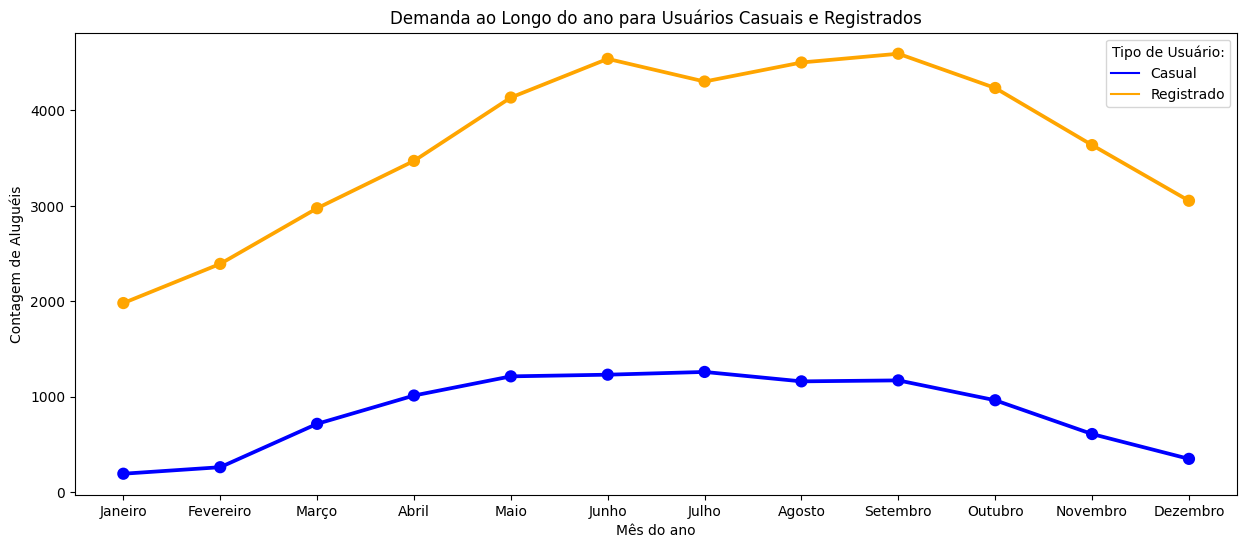

In [13]:
from matplotlib.lines import Line2D

plt.figure(figsize=(15, 6))
ax1 = sns.pointplot(x='mnth', y='casual', data=df_pt, label='Casual', ci = None, color = 'blue')
ax2 =sns.pointplot(x='mnth', y='registered', data=df_pt, label='Registrado', ci = None, color = 'orange')
plt.title('Demanda ao Longo do ano para Usuários Casuais e Registrados')
plt.xlabel('Mês do ano')
plt.ylabel('Contagem de Aluguéis')
handles = [
    Line2D([0], [0], color='blue', label='Casual'),
    Line2D([0], [0], color='orange', label='Registrado')
]
plt.legend(handles=handles, title='Tipo de Usuário:')
plt.show()




---

### Pergunta 4: Quais condições climáticas tem o maior impacto negativo na utilização das bicicletas?

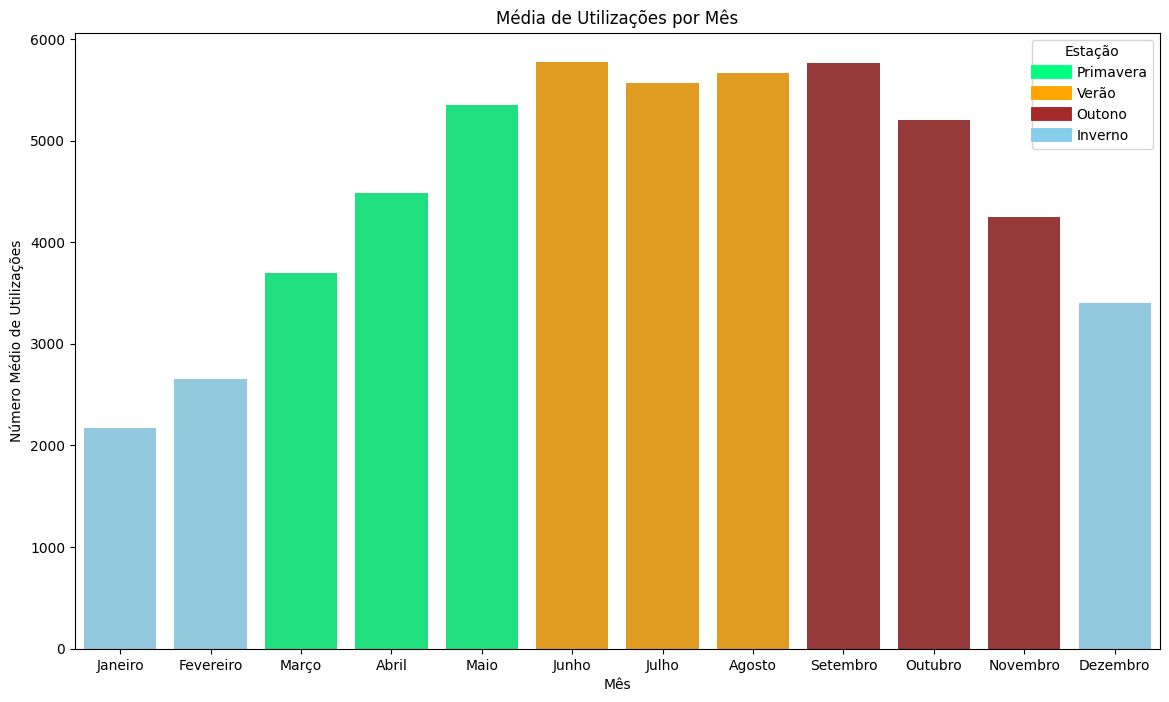

In [14]:
df['dteday'] = pd.to_datetime(df_pt['dteday'])
df['year'] = df['dteday'].dt.year

df['month'] = df['dteday'].dt.month

def definir_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Inverno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verão'
    elif mes in [9, 10, 11]:
        return 'Outono'

df['season'] = df['month'].apply(definir_estacao)
monthly_usage = df.groupby(['month', 'season'])['cnt'].mean().reset_index()
monthly_usage['month'] = pd.Categorical(monthly_usage['month'], categories=np.arange(1, 13), ordered=True)

palette = monthly_usage['season'].map(cores_estacoes)
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='cnt', data=monthly_usage, palette=palette)
plt.title('Média de Utilizações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número Médio de Utilizações')
plt.xticks(np.arange(12), ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
handles = [plt.Line2D([0], [0], color=cores_estacoes[estacao], lw=10) for estacao in cores_estacoes]
labels = list(cores_estacoes.keys())
plt.legend(handles, labels, title='Estação')
plt.show()

#### • Esse gráfico foi criado com intuito de observarmos, se existe uma concentração maior de utilização das bicicletas em determinado período do ano, podemos observar que meses que tendem a serem mais frios contêm uma menor quantidade de utilizações de bicicletas, enquanto, meses considerados mais quentes existe aumento de utilizações de bicicletas.

### Impacto das Variáveis Climáticas
##### ➛ A temperatura foi normalizada para a faixa de 0 a 1, onde 0 representa a menor temperatura observada e 1 a maior.
##### ➛ Por exemplo, "Quando a temperatura normalizada é 0.5, a temperatura real é aproximadamente 20°C."

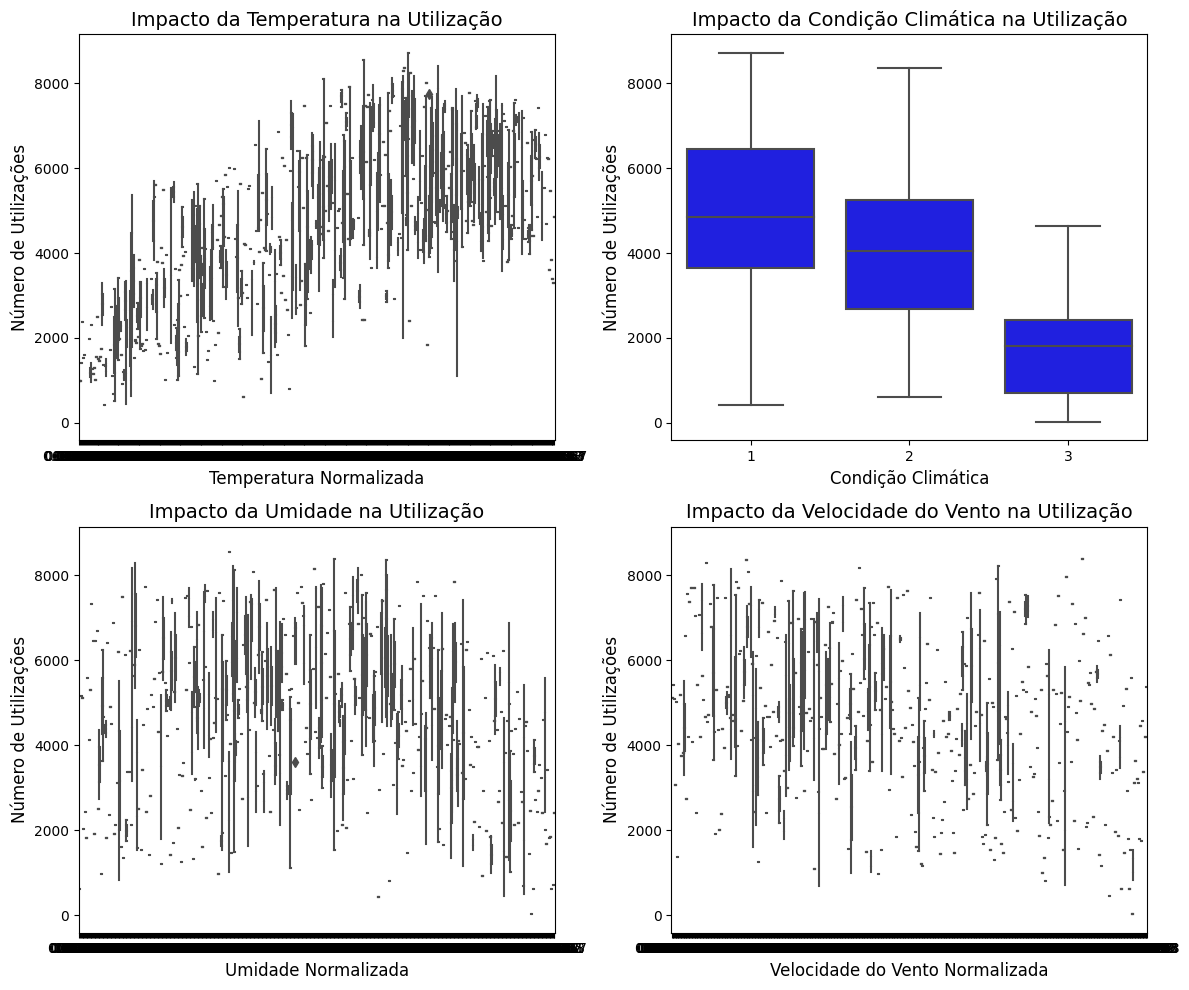

In [7]:
df['dteday'] = pd.to_datetime(df['dteday'])

plt.figure(figsize=(12, 10))

# Gráfico 1: Impacto da Temperatura na Utilização
plt.subplot(2, 2, 1)
sns.boxplot(x='temp', y='cnt', data=df, color='blue', fliersize=5)
plt.title('Impacto da Temperatura na Utilização', fontsize=14)
plt.xlabel('Temperatura Normalizada', fontsize=12)
plt.ylabel('Número de Utilizações', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

# Gráfico 2: Impacto da Condição Climática na Utilização
plt.subplot(2, 2, 2)
sns.boxplot(x='weathersit', y='cnt', data=df, color='blue', fliersize=5)
plt.title('Impacto da Condição Climática na Utilização', fontsize=14)
plt.xlabel('Condição Climática', fontsize=12)
plt.ylabel('Número de Utilizações', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

# Gráfico 3: Impacto da Umidade na Utilização
plt.subplot(2, 2, 3)
sns.boxplot(x='hum', y='cnt', data=df, color='blue', fliersize=5)
plt.title('Impacto da Umidade na Utilização', fontsize=14)
plt.xlabel('Umidade Normalizada', fontsize=12)
plt.ylabel('Número de Utilizações', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

# Gráfico 4: Impacto da Velocidade do Vento na Utilização
plt.subplot(2, 2, 4)
sns.boxplot(x='windspeed', y='cnt', data=df, color='blue', fliersize=5)
plt.title('Impacto da Velocidade do Vento na Utilização', fontsize=14)
plt.xlabel('Velocidade do Vento Normalizada', fontsize=12)
plt.ylabel('Número de Utilizações', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

#### ➡ Impacto da Temperatura na Utilização
##### • O gráfico demonstra uma boa variação de utilização, tanto em temperaturas muito geladas e muito quente, maior utilização é entre 0.5 e 0.8, mas pela dispersão dos dados podemos dizer que a temperatura nao impacta de forma tão negativa na distribbuição.
#### ➡ Impacto da Condição Climática na Utilização
##### • A condição climática indica a utilização em todas as condições, com maior frequência de uso nas duas primeiras opções.
#### ➡ Impacto da Umidade na Utilização 
##### • Já na umidade nota-se uma falta de utilização entre 0.0 a mais ou menos 0.3, tendo uso entre 0.4 a 1, pode-se dizer que existe um impacto negativo pois existe um periodo que praticamente não se era utilizado as bicicletas.
#### ➡ Impacto da velocidade do Vento na Utilização
##### • A velocidade do tempo também existe uma variação interessante, entre 0.0 a 0.4 existe utilização das bicicletas, com um aumento significativo entre 0.1 e 0.2, apartir de 0.4 cai significamente o uso, por esse motivo essa condição climática também causa um impacto significativo.

---

### Pergunta 5: Existe uma correlação significativa entre eventos especiais (como feriados e eventos locais) e o uso das bicicletas compartilhadas?

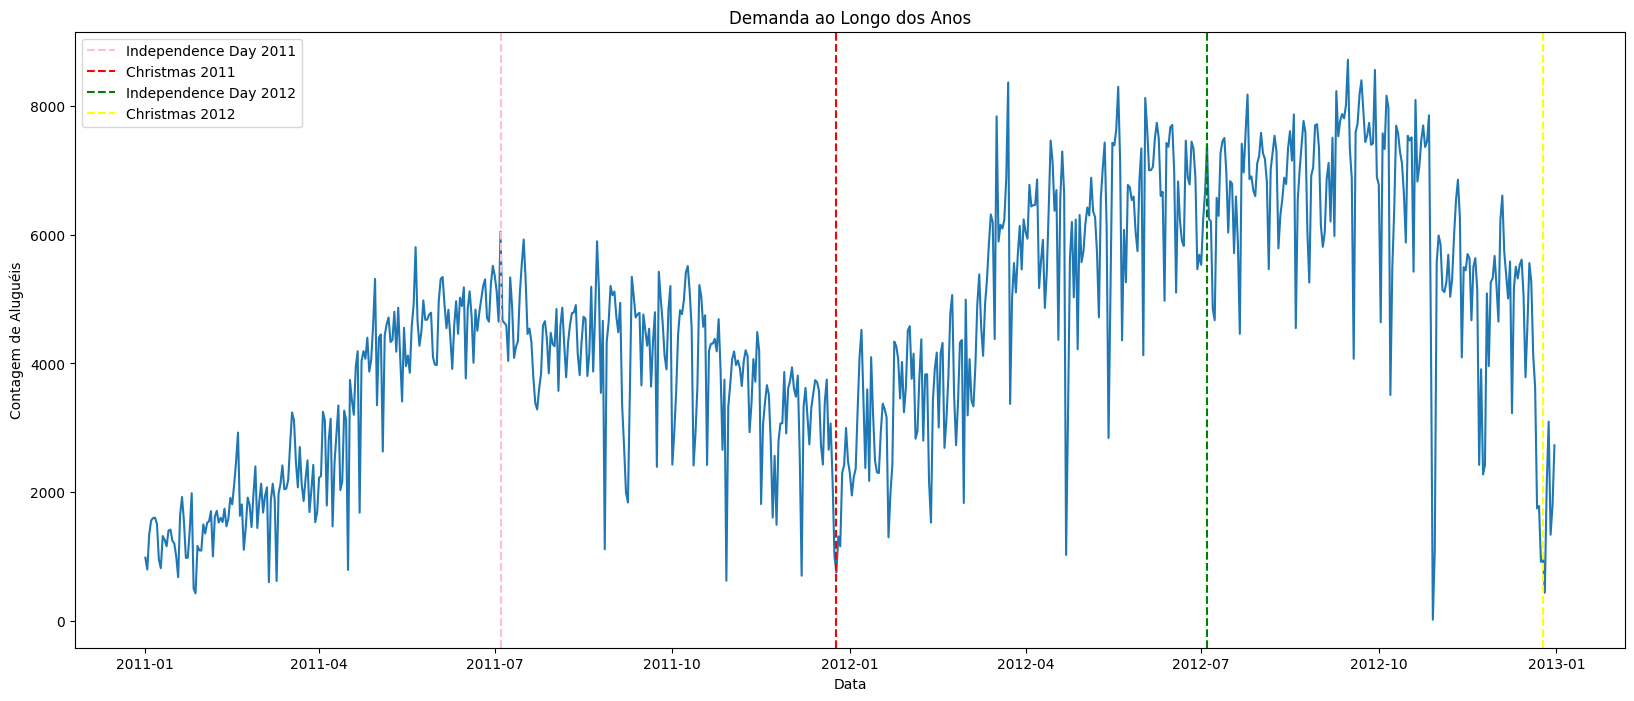

In [16]:
df_pt['dteday'] = pd.to_datetime(df_pt['dteday'])

plt.figure(figsize=(20, 8))
sns.lineplot(x='dteday', y='cnt', data=df_pt, ci=None)
plt.title('Demanda ao Longo dos Anos')
plt.xlabel('Data')
plt.ylabel('Contagem de Aluguéis')
plt.axvline(pd.Timestamp('2011-07-04'), color='pink', linestyle='--', label='Independence Day 2011')
plt.axvline(pd.Timestamp('2011-12-25'), color='red', linestyle='--', label='Christmas 2011')
plt.axvline(pd.Timestamp('2012-07-04'), color='green', linestyle='--', label='Independence Day 2012')
plt.axvline(pd.Timestamp('2012-12-25'), color='yellow', linestyle='--', label='Christmas 2012')
plt.legend()
plt.show()

Pelo dataset ter sido construído por uma universidade da Califórnia, considerei dois feriados dos EUA:
- Durante o feriado de natal dos anos em que o dataset abrange, sempre há uma queda nas alocações das bicicletas.
- Os feriados do 04/07 apresentam uma leve tendência de alta nas utilizações.
- Parece haver uma menor procura durante os últimos e os primeiros meses dos anos, que pode ser influenciado por outros fatores.

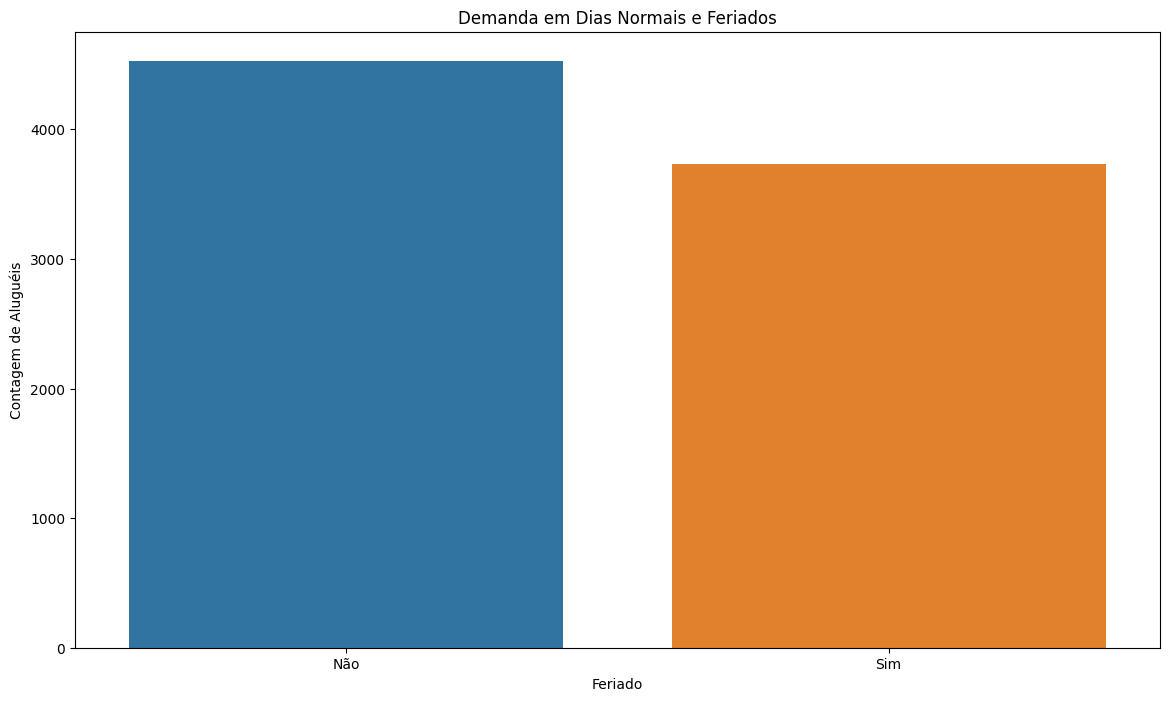

In [17]:
plt.figure(figsize=(14, 8))
sns.barplot(x='holiday', y='cnt', data=df_pt, ci=None)
plt.title('Demanda em Dias Normais e Feriados')
plt.xlabel('Feriado')
plt.ylabel('Contagem de Aluguéis')
plt.show()

É possível observar que a utilização durante os feriados apresentam menor média, embora a diferença da utilização entre os dias normais e feriados não seja tão alto.

# 3. Insights

## Com essas análises obtivemos os seguintes insights:

- Dias com céu limpo ou ensolarado possuem maior demanda do que dias frios, em dias úteis a demanda também tende a aumentar.

- A demanda por bicicletas compartilhadas é maior durante o verão e menor no inverno, indicando uma forte influência sazonal. No verão em dias de fim de semana a demanda aumenta, indicando que no verão existe uma ênfase em lazer.

- O gráfico mostra claramente que usuários registrados utilizam o serviço radicalmente mais que usuários casuais, e ainda mostra os meses que aumentam e diminuem a contagem de aluguéis.

- Com base nas análises gráficas, tem-se que o impacto na velocidade do vento e o impacto na umidade são os fatores mais prejudiciais na demanda de bicicletas.

- Eventos locais e feriados tendem a variar a demanda de utilização das bicicletas, o gráfico mostra que em feriados a demanda diminuiu.
